# Supplementary figure 2: comparison of the different mapping methods. 

In this notebook, we will visually explore the results of the 4 different methods that we use to disentangle the spatial organization of the cells. 

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from adjustText import adjust_text


import sys
sys.path.insert(1, global_path + 'Functions/')
from mapping_exploration import prepare_cell2loc, prepare_cytospace, prepare_tangram, prepare_patological, abundances_figure, celltrek_figure
from process_visium import visium_noh5


plt.rcParams['font.family'] = 'FreeSans' 
title_size = 18
labelout_size = 10
label_size = 8
ticks_size = 6




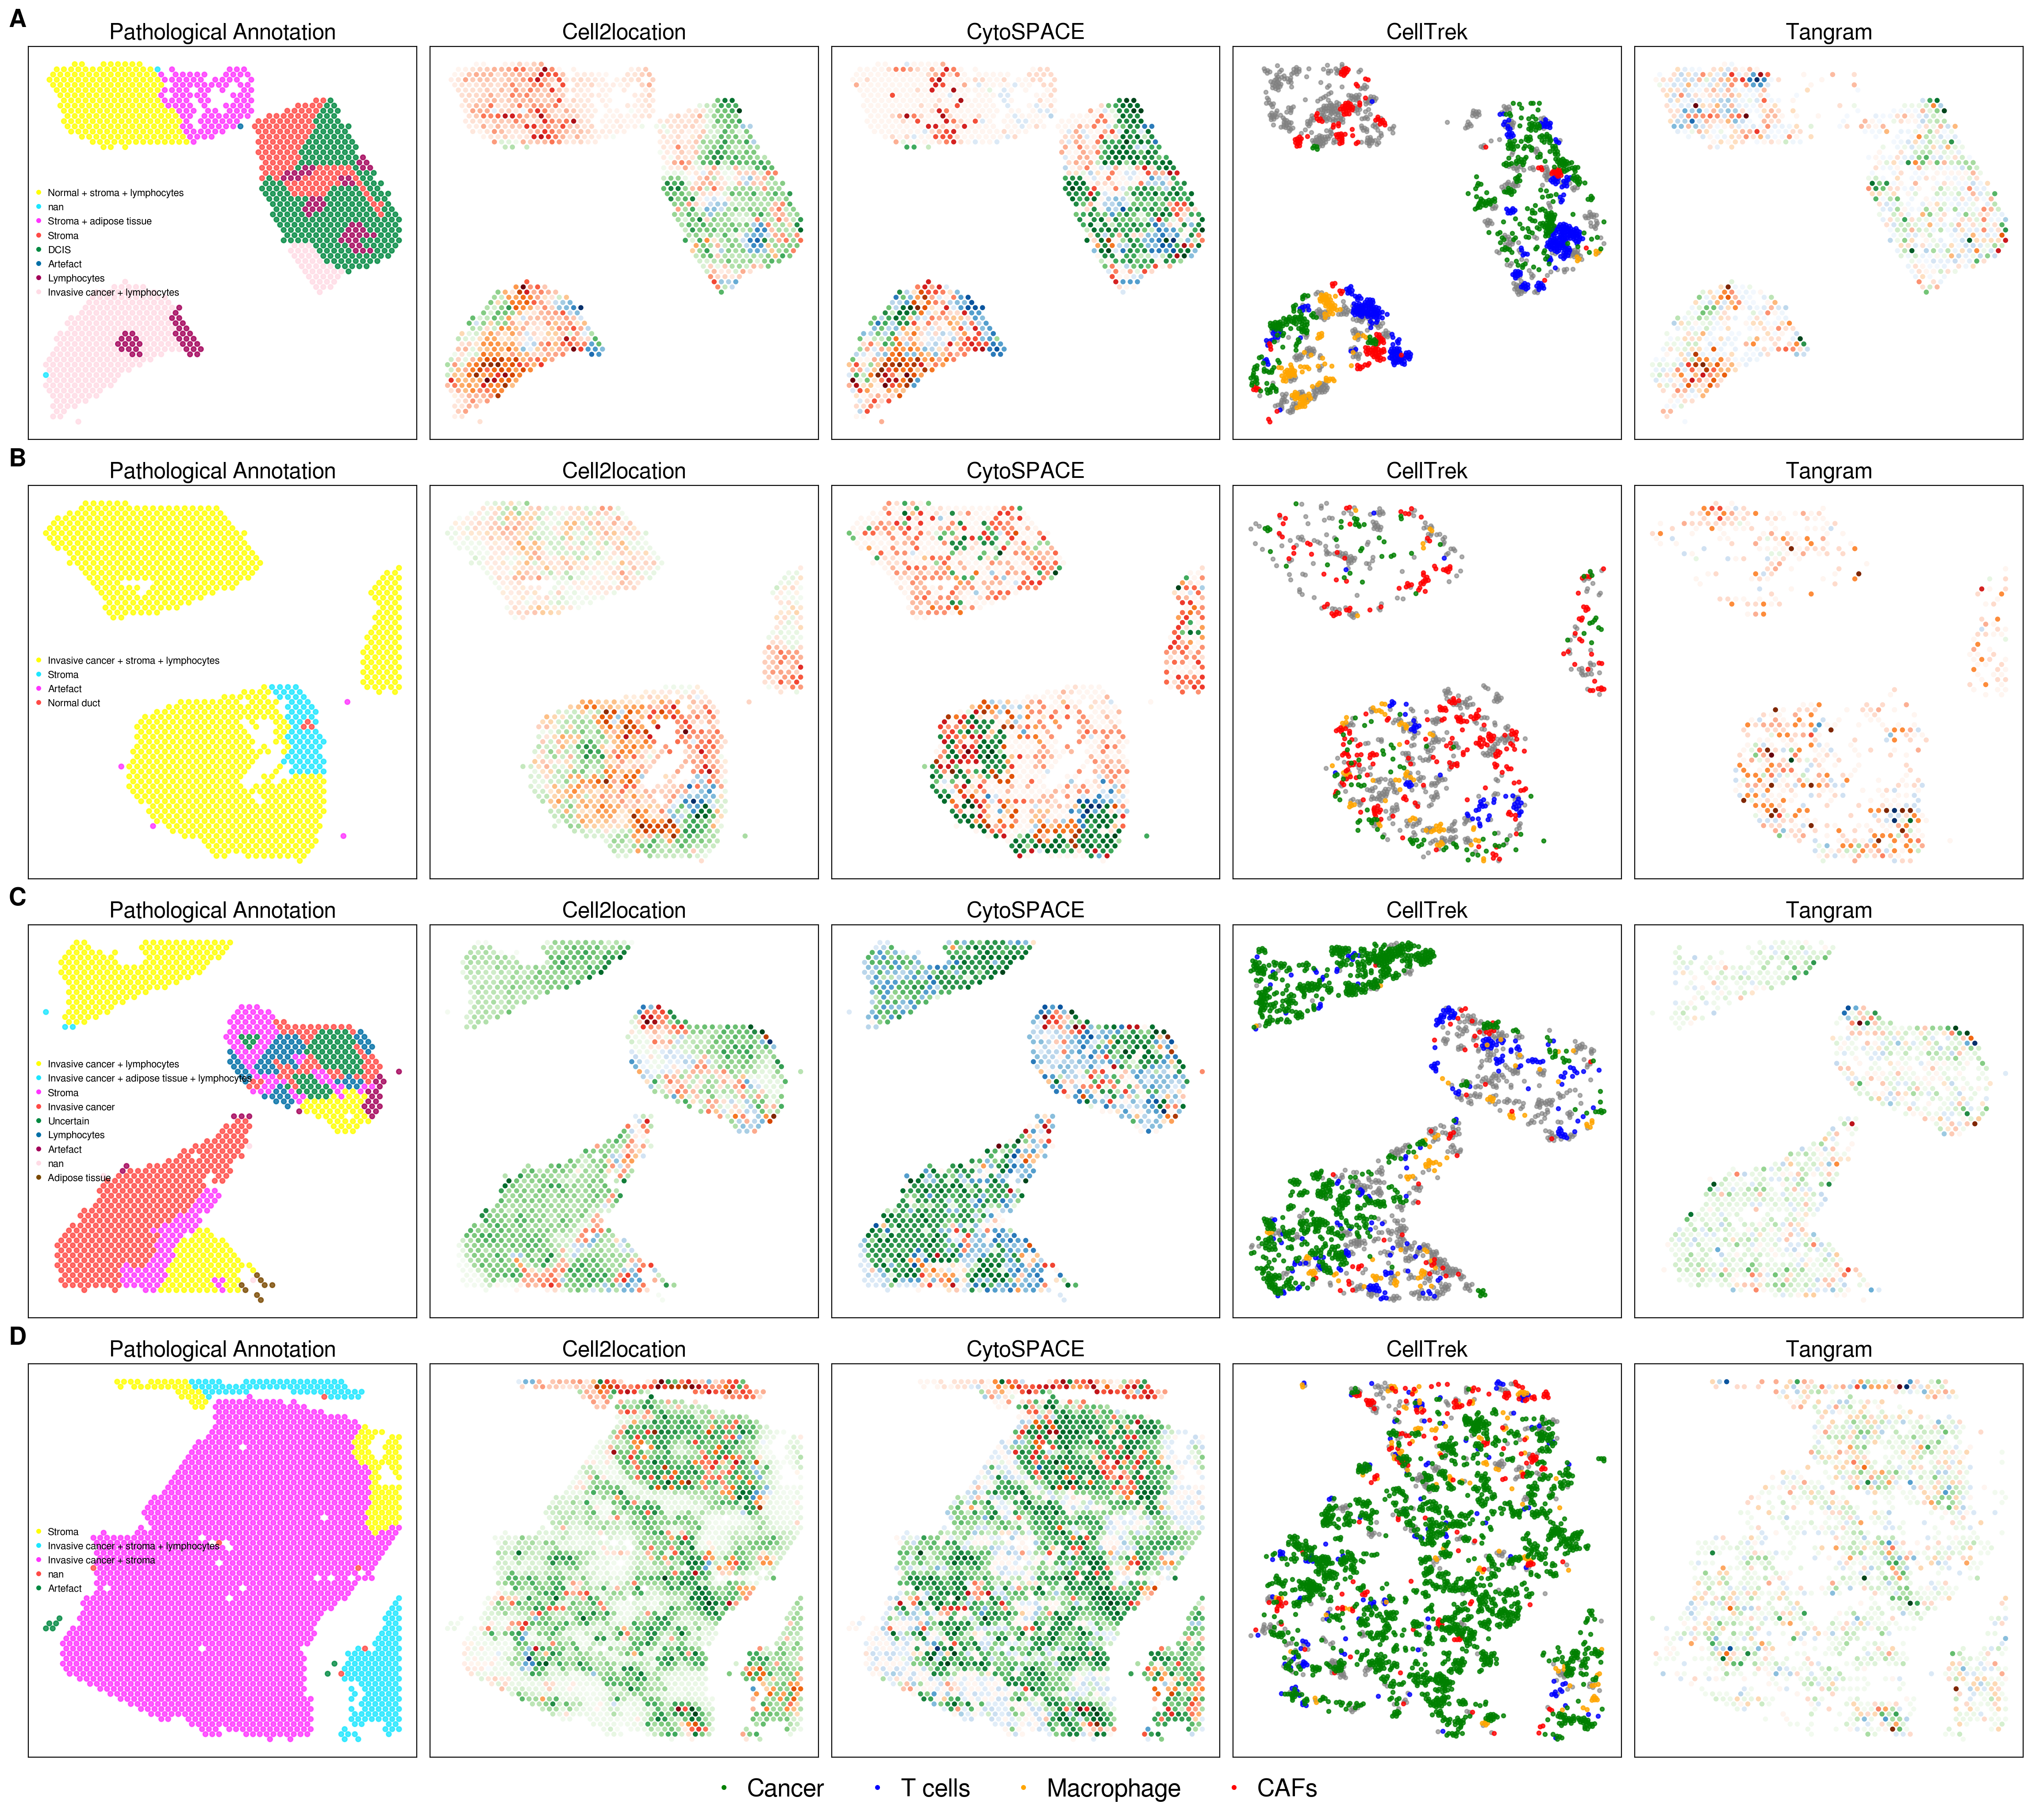

In [3]:
cells = ['Cancer', 'T cells', 'Macrophage', 'CAFs']
patients = ['CID44971', 'CID4465', 'CID4535', 'CID4290']
labels = ['A', 'B', 'C', 'D']
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(23,20), dpi = 200)

for i, patient in enumerate(patients): 
    p_c2l = global_path + 'Results/Breast/cell2location/' + patient +'/'
    p_cyto = global_path + 'Results/Breast/CytoSPACE/' + patient +'/'
    p_tg = global_path + 'Results/Breast/Tangram/' + patient +'_ad_map.h5ad'
    p_ctk = global_path + 'Results/Breast/CellTrek/meta_cellcharting_' + patient +'.csv'

    array_abundances_c2l, coords_c2l = prepare_cell2loc(p_c2l, cells)
    array_abundances_cyto, coords_cyto = prepare_cytospace(p_cyto, cells)
    array_abundances_tg, coords_tg = prepare_tangram(p_tg, cells)
    adata_vis, type2color = prepare_patological(patient)
    xs = adata_vis.obs.array_row.values
    ys = adata_vis.obs.array_col.values

    axs[i, 0].scatter(ys, -xs, s=15, c= list(adata_vis.obs.color.values), alpha = 0.8)
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('')
    axs[i, 0].set_title('Pathological Annotation', fontsize = title_size)
    axs[i, 0].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=region, markersize=5, markerfacecolor=color) for region, color in type2color.items()]
    axs[i, 0].legend(handles=legend_elements, loc='center left', frameon=False, fontsize=label_size, handlelength=0.3)

    abundances_figure(array_abundances_c2l, coords_c2l, axs[i, 1], cells, 'Cell2location', colorbar = False)
    abundances_figure(array_abundances_cyto, coords_cyto, axs[i, 2], cells, 'CytoSPACE', colorbar = False)
    celltrek_figure(p_ctk, cells, axs[i, 3], cells, 'CellTrek')
    abundances_figure(array_abundances_tg, coords_tg, axs[i, 4], cells, 'Tangram')
    axs[i, 0].text(-0.05, 1.05, labels[i], transform=axs[i, 0].transAxes, size=20, weight='bold')


color_value_dict = {'green': 'Cancer', 'blue': 'T cells','orange': 'Macrophage','red': 'CAFs'}
legend_elements = [Line2D([0], [0], marker='o', color='w', label=color_value_dict[color], markersize=5, markerfacecolor=color) for color in color_value_dict]
plt.tight_layout()
fig.legend(handles=legend_elements, loc='lower center', ncol=len(color_value_dict),  bbox_to_anchor=(0.5, -0.03), frameon=False, fontsize=20, handlelength=0.3)
